In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df=pd.read_csv("data.csv")
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [3]:
obj=df.isnull().sum()
for key, value in obj.iteritems():
    print(key,",",value)

User_ID , 0
Gender , 0
Age , 0
Height , 0
Weight , 0
Duration , 0
Heart_Rate , 0
Body_Temp , 0
Calories , 0


In [4]:
lst_gender=df["Gender"].value_counts().head(1).index
lst_gender=list(lst_gender)
lst_gender

['female']

In [5]:
for gender in lst_gender:
    df[gender]=np.where(df["Gender"]==gender,1,0)

In [6]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,female
0,14733363,male,68,190,94,29,105,40.8,231,0
1,14861698,female,20,166,60,14,94,40.3,66,1
2,11179863,male,69,179,79,5,88,38.7,26,0
3,16180408,female,34,179,71,13,100,40.5,71,1
4,17771927,female,27,154,58,10,81,39.8,35,1


## Seperating Dependent and Independent variables

In [7]:
X=df.iloc[:,[2,3,4,5,6,7,9]]
X.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female
0,68,190,94,29,105,40.8,0
1,20,166,60,14,94,40.3,1
2,69,179,79,5,88,38.7,0
3,34,179,71,13,100,40.5,1
4,27,154,58,10,81,39.8,1


In [8]:
y=df.iloc[:,[8]]
y.head()

,Calories
0,231
1,66
2,26
3,71
4,35


## Feature selection 

### Correlation

1.As it is a regression problem statement there should be some relationship between dependant variable and independant variable.

2.Then check the correlation between the dependant variable.

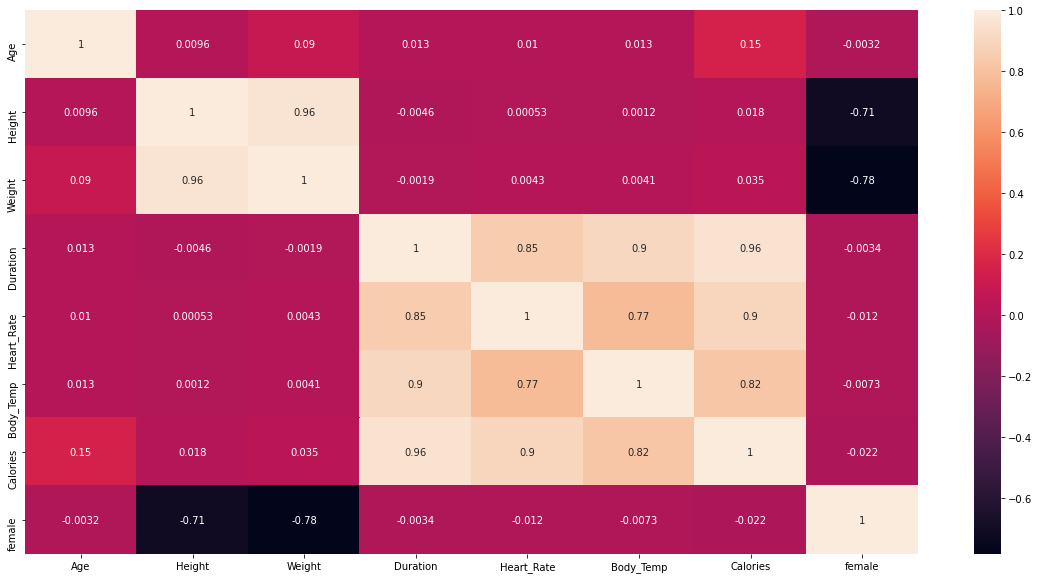

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
a=df.drop(["User_ID"],axis=1)
sns.heatmap(a.corr(),annot=True)
plt.show()

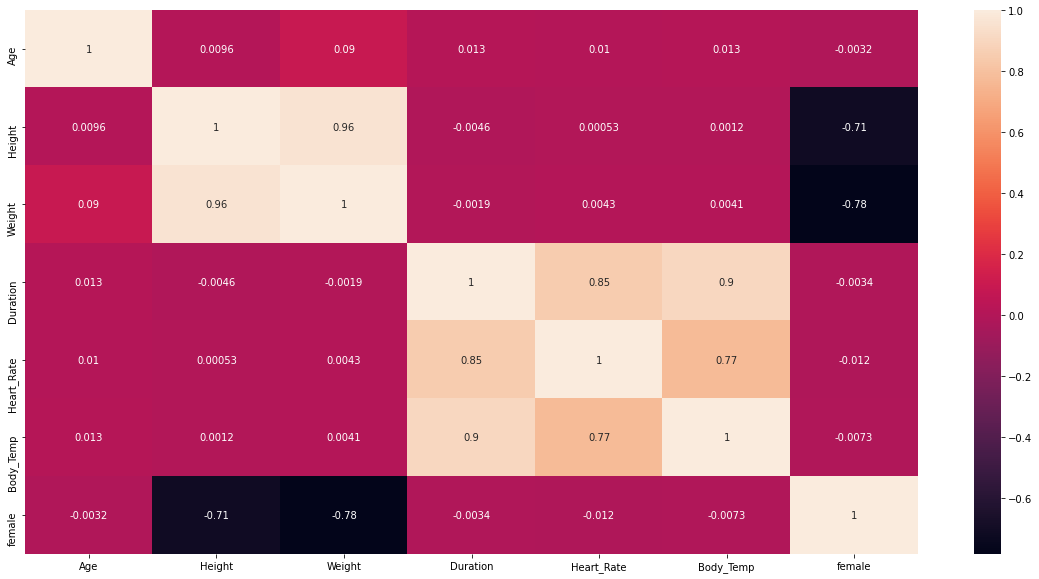

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)
plt.show()

### Feature Importance 

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

In [12]:
df.feature =pd.DataFrame(X.columns,columns=["Feature"])
df.importance=pd.DataFrame(etr.feature_importances_,columns=["Importance"])
after_concat=pd.concat([df.feature,df.importance],axis=1)
after_concat.nlargest(7,"Importance")

,Feature,Importance
3,Duration,0.653829
4,Heart_Rate,0.210441
5,Body_Temp,0.098164
0,Age,0.026389
6,female,0.008319
2,Weight,0.001695
1,Height,0.001162


### SelectK best 

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
skb=SelectKBest(k=7,score_func=chi2)
skb.fit(X,y)

SelectKBest(k=7, score_func=<function chi2 at 0x7fba42dd95e0>)

In [14]:
df.feature =pd.DataFrame(X.columns,columns=["Feature"])
df.score=pd.DataFrame(skb.scores_,columns=["Score"])
after_concat_1=pd.concat([df.feature,df.score],axis=1)
after_concat_1.nlargest(7,"Score")

,Feature,Score
3,Duration,63736.882215
4,Heart_Rate,11990.436329
0,Age,6213.761331
2,Weight,1782.146288
1,Height,574.729710
6,female,272.090135
5,Body_Temp,202.785507


In [15]:
X_update=X.iloc[:,[3,4,0,2]]
X_update.head()

,Duration,Heart_Rate,Age,Weight
0,29,105,68,94
1,14,94,20,60
2,5,88,69,79
3,13,100,34,71
4,10,81,27,58


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_update,y,test_size=.20,random_state=100)
print(X_train.shape)
print(X_test.shape)

(12000, 4)
(3000, 4)


# Linear Regression 

In [17]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred_linear_train=linear.predict(X_train)
y_pred_linear_test=linear.predict(X_test)

### Accuracy

In [19]:
from sklearn import metrics
print("Mean Absolute Error for train is ", metrics.mean_absolute_error(y_train,y_pred_linear_train))
print("R2 for train is", metrics.r2_score(y_train,y_pred_linear_train))
print("Mean Absolute Error for test is ", metrics.mean_absolute_error(y_test,y_pred_linear_test))
print("R2 for test is", metrics.r2_score(y_test,y_pred_linear_test))

Mean Absolute Error for train is  9.622127337206864
R2 for train is 0.9587487090653142
Mean Absolute Error for test is  9.503690604377713
R2 for test is 0.9589924732532775


## Visualize

Text(0.5, 0, 'Train')

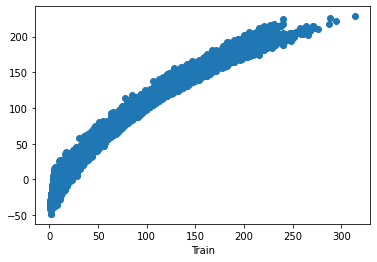

In [20]:
plt.scatter(y_train,y_pred_linear_train)
plt.xlabel("Train")

Text(0.5, 0, 'Test')

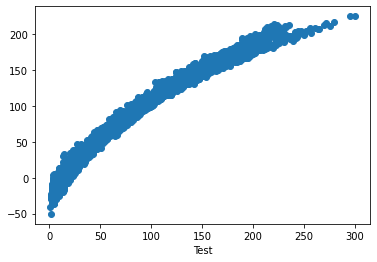

In [21]:
plt.scatter(y_test,y_pred_linear_test)
plt.xlabel("Test")

# RandomForest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
y_pred_random_train=rfr.predict(X_train)
y_pred_random_test=rfr.predict(X_test)

In [26]:
print("Mean Absolute Error for train is ", metrics.mean_absolute_error(y_train,y_pred_random_train))
print("R2 for train is", metrics.r2_score(y_train,y_pred_random_train))
print("Mean Absolute Error for test is ", metrics.mean_absolute_error(y_test,y_pred_random_test))
print("R2 for test is", metrics.r2_score(y_test,y_pred_random_test))

Mean Absolute Error for train is  0.9327065496031746
R2 for train is 0.9992804151681471
Mean Absolute Error for test is  2.401549111111111
R2 for test is 0.9950836839310151


Text(0.5, 0, 'Train')

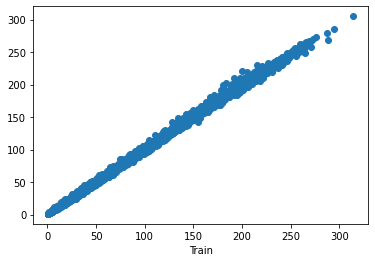

In [27]:
plt.scatter(y_train,y_pred_random_train)
plt.xlabel("Train")

Text(0.5, 0, 'Test')

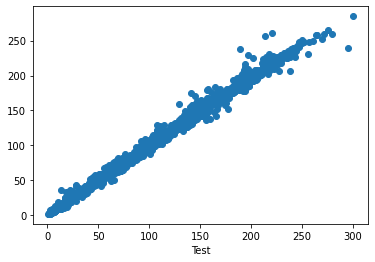

In [28]:
plt.scatter(y_test,y_pred_random_test)
plt.xlabel("Test")

In [33]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rfr,file)
file.close()

In [36]:
a=rfr.predict(b)

ValueError: Expected 2D array, got 1D array instead:
array=[10. 90. 55. 60.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [35]:
b=[10,90,55,60]